# Kernel Methods

main idea: data represented as pairwise inner products rather than as points in euclidean space

**def** kernel function

$K(x_i, x_j) = \phi(x_i)^\top \phi(x_j)$

where $\phi$ is some feature space

we do not need to know the space, as long as it exists (certain criteria need to be met)

**def** kernel method

learning algorithm that uses only the pairwise evaluations of a kernel function rather than the data directly

**e.g.** linear kernel

$K_1(x_i, x_j) = x_i^\top x_j$

$\phi(x) = x$

**e.g.** quadratic kernel

$K_2(x_i, x_j) = (x_i^\top x_j + 1)^2$

to show it is a valid kernel, we need to find $\phi$ s.t. $\phi(x) \in \mathbb{R}^q$ for some $q \in \mathbb{N}$

$K_2(x_i, x_j) = (\sum_k x_{ik} x_{jk} + 1) (\sum_l x_{il} x_{jl} + 1)$  
$= \sum_k \sum_l x_{ik} x_{il} x_{jk} x_{jl} + \sum_k x_{ik} x_{jk} + \sum_l x_{il} x_{jl} + 1$

then we can see that $\phi(x_i)$ consists of $[x_{ik} x_{il}, \cdots, x_{ik}, \cdots, 1]$

**e.g.** polynomial kernel

$K_p(x_i, x_j) = (x_i^\top x_j + 1)^p$

**e.g.** polynomial kernel of infinite dimension

$K(x_i, x_j) = e^{x_i^\top x_j}$

can use taylor series to show that this is a kernel

$K(x_i, x_j) = \sum_k \frac{1}{k!} (x_i^\top x_j)^k$

So $\phi : \mathbb{R}^d \to \mathbb{R}^\infty$

**theorem**

let $K(\cdot, \cdot)$ be a kernel function with feature representation $\phi(\cdot)$  
let $c \in \mathbb{R}+$

then $c K(\cdot, \cdot)$ is also a kernel function and has representation function $\sqrt{c} \phi(\cdot)$

**e.g.** RBF/gaussian/square exponential/heat kernel

$K(x_i, x_j) = e^{-\frac{|x_i - x_j|^2}{s^2}}$

to show that it is a kernel, we can expand:

$K(x_i, x_j) = e^{-|x_i|^2 / s^2} e^{-|x_j|^2 / s^2} e^{2 x_i^\top x_j / s^2}$

the last term is the polynomial kernel function, and then this is multiplied by terms that depend only on $x_i$ and $x_j$, so the representation function can be written as

$\phi(x) = e^{-|x|^2 / s^2} \phi_p(x)$  
where $\phi_p$ is the polynomial kernel representation function

**def.** online logistic regression

for logistic regression, $\partial_w \ell = \Phi^\top (t - y)$  
or for just one observation, $(t_i - y_i) \phi(x_i)$

regular gradient descent has update step $w^{(k+1)} = w^{(k)} + \Phi^\top (t - y^{(k)})$

we can update one observation at a time and weigh the observations:

$w_i^{(k+1)} = w_i^{(k)} + \gamma_i (t_i - y_i^{(k)}) \phi(x_i)$

**def** perceptron

redefine $t_i \in \{-1, +1\}$

initialize $w = 0$

for $i \in 1 .. n$:

1. predict $\hat{t}_i = sign(w^\top \phi(x_i))$
2. if $\hat{t}_i \neq t$, then update $w \leftarrow w + t_i \phi(x_i)$

**def** dual perceptron

let $w = \sum_i \alpha_i t_i \phi(x_i)$  
where $\alpha_i$ is the number of times updates were made on observation $i$

then the algorithm becomes:

initialize $\alpha_i = 0$ $\forall i \leq n$  
initialize $w = 0$

for $i \in 1 ..n$:

1. $\hat{t}_i = sign((\sum_k \alpha_k t_k \phi(x_k))^\top \phi(x_i))$  
$= sign \bigg(\sum_k \alpha_k t_k K(x_k, x_i) \bigg)$
2. if $\hat{t}_i \neq t$, then update $\alpha_i \leftarrow \alpha_i + 1$

**def** nearest neighbors classifier

given a training set in $\mathbb{R}^d$, for a new point $z \in \mathbb{R}^d$, classify according to nearest point to $z$ in the training set

note that $|x_i - z|^2 = |x_i|^2 + |z|^2 - 2 x_i^\top z$
$= K(x_i, x_i) + K(z, z) - 2 K(x_i^\top z)$  
for the linear kernel

so we can redefine this as a kernel method

**e.g.** regularized linear regression

$\arg\min_w \frac{1}{2} \sum_i (w^\top \phi(x_i) - t_i)^2 + \frac{1}{2} \lambda |w|^2$

we can solve this by taking the gradient w.r.t. $w$ and setting to 0, and we get an estimate for $w$:

$0 = \sum_i (w^\top \phi(x_i) - t_i) \phi(x_i) + \lambda w$  
$\implies w = -\sum_i \lambda^{-1} (w^\top \phi(x_i) - t_i) \phi(x_i)$
$= \Phi^\top a$  
where $a = - \lambda^{-1} (\Phi w - t)$

then we get $a = -\frac{1}{\lambda} (\Phi \Phi^\top a - t)$  
$\implies a = (\lambda I + \Phi \Phi^\top)^{-1} t$

then $w = \Phi^\top (\lambda I + \Phi \Phi^\top)^{-1} t$

and $\hat{t} = \phi(x)^\top w = \phi(x) \Phi^\top (\lambda I + \Phi \Phi^\top)^{-1} t$  
$= k(x)^\top (\lambda I + K)^{-1} t$  
where $k(x)$ is a vector with entries $K(x, x_i)$ and $x_i$ are observations from the training set

so we can just use the kernel values to compute

**theorem** Mercer's theorem

$K(\cdot, \cdot)$ is a kernel function iff for a sample $X_1, ..., X_n$, the kernel matrix $K \in \mathbb{R}^{n \times n}$ where $K_{ij} = K(X_i, X_j)$, $K$ is symmetric and positive semidefinite

*proof*

right to left: 

we know that $K(x_i, x_j) = \phi(x_i)^\top \phi(x_j)$  
let $c$ be a nonzero vector in $\mathbb{R}^n$  
$c^\top K c = \sum_i \sum_j c_i c_j K(x_i, x_j)$  
$= \sum_i \sum_j c_i c_j \phi(x_i)^\top \phi(x_j)$  
$= (\sum_i c_i \phi(x_i)^\top) (\sum_j c_j \phi(x_j))$  
$= |\sum_i c_i \phi(x_i)|^2 \geq 0$

*left to right*

TBD

**theorem** representer theorem

given a optimization problem $\arg\min_w \sum_i l(w^\top \phi(x_i), y_i) + \lambda R(|w|)$ where $R$ is monotonic

the solution has the form $\hat{w} = \sum_k \gamma_k \phi(x_k)$

## Ordinal regression

labels are still called $\{1, 2, ..., k\}$, but we think of them as levels that can be compared

parameters $\alpha, \phi_1, ..., \phi_{k-1}$  
$-\infty = \phi_0 < \phi_1 < \cdots < \phi_{k-1} < \phi_k = \infty$

$P(t_i = j) = \sigma(\alpha (\phi_j - a_i)) - \sigma(\alpha(\phi_{j-1} - a_i))$  
if we denote $y_{ij} = \sigma(\alpha(\phi_j - a_i))$, then 
$P(t_i = j) = y_{ij} - y_{i, j-1}$

$a_i$ is a shifting parameter and $\alpha$ is a scaling parameter

### Likelihood estimation

$L = \prod_i^n \prod_j^k (y_{ij} - y_{i, j-1})^{t_{ij}}$

$\ell = \sum_i \sum_j t_{ij} (\log(y_{ij} - y_{i, j-1}))$

$\nabla_w \ell = -\sum_i \sum_j t_{ij} \frac{y_{ij} (1 - y_{ij})\alpha \phi(x_i) - y_{i, j-1} (1 - y_{i, j-1}) \alpha \phi(x_i)}{y_{ij} - y_{i, j-1}}$  
$= \sum_i \sum_j t_{ij} \phi(x_i) \alpha (y_{ij} + y_{i, j-1} - 1)$  
$= \Phi^\top d$  
where $d_i = \sum_j \alpha t_{ij} (y_{ij} + y_{i, j-1} - 1)$
$= \alpha( y_{i, t_i} + y_{i, t_i - 1} - 1)$

$\nabla \times \nabla \ell = -\alpha \sum_i \sum_j t_{ij} \phi(x_i) (y_{ij} (1 - y_{ij}) \alpha \phi(x_i)^\top + y_{i, j-1} (1 - y_{i, j-1}) \alpha \phi(x_i)^\top)$  
$= -\alpha^2 \sum_i \sum_j t_{ij} (y_{ij} (1 - y_{ij}) + y_{i, j-1} (1 - y_{i, j-1})) \phi(x_i) \phi(x_i)^\top$

letting $r_i = -\alpha^2 \sum_j t_{ij} (y_{ij} (1 - y_{ij}) + y_{i, j-1} (1 - y_{i, j-1})$
$= \alpha (y_{i, t_i} (1 - y_{i, t_i}) + y_{i, t_i - 1} (1 - y_{i, t_i - 1})$  and $R = diag(r_1, ..., r_n)$, we can rewrite  
$H = -\Phi^\top R \Phi$

## Gaussian processes

**def** gaussian process

define a distribution over functions with the same domain in $\mathbb{R}$:

* mean function $m(x)$, $m : \mathbb{R} \to \mathbb{R}$
* covariance function $c(x_1, x_2), c : \mathbb{R}^2 \to \mathbb{R}+$

for a sample along the domain of the functions $\mathbb{X} = \{x_1, ..., x_n\}$,  
$f(x) = \begin{bmatrix} f(x_1) \\ \vdots \\ f(x_n) \end{bmatrix} \sim \mathcal{N}_n \Bigg(\begin{bmatrix} m(x_1) \\ \vdots \\ m(x_n) \end{bmatrix}, C \Bigg)$  
where $C_{ij} = c(x_i, x_j)$

**e.g.** bayesian linear regression is a special case of gaussian processes

$w \sim \mathcal{N}(0, \alpha^{-1} I)$  
$t \mid w \sim \mathcal{N}(\Phi w, \beta^{-1} I)$  
$t_i \mid w \sim \mathcal{N}(w^\top \phi(x_i), \beta^{-1})$

then the marginal $t \sim \mathcal{N}(0, \beta^{-1} I + \alpha^{-1} K)$  
where $K = \Phi \Phi^\top$

for linear regression, we use the linear kernel

**e.g.** prediction via gaussian processes

let $t$ be a vector of observed responses $\begin{bmatrix} t_1 \\ \vdots \\ t_n \end{bmatrix}$

let $\hat{t}$ be $t_n$ with a new entry $t_{n+1}$ which is the prediction for a new set of observed features $\phi(x_{n+1})$

$\hat{t} = \begin{bmatrix} t_{n+1} \\ t_1 \\ \vdots \\ t_n \end{bmatrix} \sim \mathcal{N}(0, \begin{bmatrix} c & v^\top \\ v^\top & C \end{bmatrix})$

where $C$ is the covariance matrix of the original sample,  
$c = C(x_{n+1}, x_{n+1})$  
$v = \begin{bmatrix} c(x_1, x_{n+1}) \\ \vdots \\ c(x_n, x_{n+1}) \end{bmatrix}$

then $t_{n+1} \mid t \sim \mathcal{N}(v^\top C^{-1} t, c - v^\top C^{-1} v)$

note that 
$v^\top C^{-1} t = t^\top C^{-1} v = \sum_i \gamma_i C(x_i, x_{n+1})$  
where $\gamma_i$ is the $i^{th}$ entry of $t^\top C^{-1}$

we can replace the covariance with any kernel function

### Model selection

evidence has closed form $t \sim \mathcal{N}(0, C)$  
can write as a function of hyperparameters  
then to find estimates for hyperparameters, take the derivative of the evidence (or log evidence) w.r.t. the hyperparameters and set to 0

**e.g.** RBF kernel

* $K(x_i, x_j) = e^{-\frac{1}{2s^2} (x_i - x_j)^2}$
* let $C = \beta^{-1} I + \alpha^{-1} K$

then take the derivatives w.r.t. $\alpha$, $\beta$, and $s$

## Support vector machines

choosing the "best" separating hyperplane for classification

**e.g.** 

given a training set with two classes that are linearly separable, how do we choose the best separating hyperplane?

infinitely many separating hyperplanes may exist

perhaps we want to choose one that maximizes the distance between the hyperplane and the points

let $\gamma_i = t_i (w^\top \phi(x_i) + w_0)$

then we want $\max_{w, w_0} \min_i \gamma_i$,  
subject to $|w| = 1$,  
i.e., maximize the distance from the hyperplane to the closest point

$\min_i \gamma_i$ is the distance to the nearest point (margin)  
so we want to maximize the margin

if $w$ is a unit vector perpendicular to a hyperplane that contains the origin, then $|w^\top \phi(x_i)|$ is the distance form $\phi(x_i)$ to the hyperplane (value inside the absolute value can be positive or negative, which is why we multiply by $t_i$)

if we have an affline hyperplane, then we have to add by some value $w_0$ (before multiplying by $t_i$)

let $w^*$ be the optimal solution and achieves value $\gamma$ for some $i$  
then $\forall i$, $t_i (w^{*\top} \phi(x_i) + w_0) = \gamma_i \geq \gamma$  
dividing by $\gamma$ yields $\gamma^{-1} t_i (w^{*\top} \phi(x_i) + w_0) \geq 1$  
if we let $v = \gamma^{-1} w^*$ and $v_0 = \gamma^{-1} w_0$, then we get 
$t_i (v^\top \phi(x_i) + v_0) \geq 1$

so we can reparameterize the problem as  
$\min_v \frac{1}{2} |v|^2$ subject to $t_i (v^\top \phi(x_i) + v_0) \geq 1$  
*primal form of support vector machines*

### inequality constraints

previously we used lagrange multipliers for optimization with equality constraints

suppose we want to find $\arg\min_p f(p)$ subject to $h_j(p) = 0$ for $j = 1, ..., n$ and $g_k(p) \leq 0$ for $k = 1, ..., m$

then the lagrangian is $L(p) = f(p) + \sum_j \beta_j h_j(p) + \sum_k \alpha_k g_k(p)$  
and we impose the condition $\alpha_k \geq 0$ $\forall k$

the *dual objective function* is $\forall \alpha, \beta$, $\theta(\alpha, \beta) = \min_p L(p, \alpha, \beta)$  
and the *dual optimization problem* is $\max_{\alpha, \beta} \theta(\alpha, \beta)$ with $\alpha_k \geq 0$

theorems

* for all points $p, \alpha, \beta$ in the constraint, $f(p) \geq L(p, \alpha, \beta)$
* if $f(p)$ is convex and $h_j$ and $g_k$ are linear, let $p^*$ be the solution to the original optimization problem and $\alpha^*, \beta^*$ be the solution to the dual problem, then $f(p^*) = \theta(\alpha^*, \beta^*)$
* the optimal solution corresponds to $\partial_p L = 0$, $\partial_\beta L = 0$, $\alpha_k \geq 0$, and $\alpha_k g_k(p) = 0$  
if $\alpha_k \neq 0$, then $g_k(p) = 0$ (tight constraint)  
if $g_k(p) \neq 0$, then $\alpha_k = 0$ ($\alpha_k$ is redundant)

**e.g.**

let $f(x) = (x - 2) (x - 3) = x^2 - 5x + 6$

minimize $f(x)$ s.t. $x \geq 3 \implies 3 - x \leq 0$  
then the solution is just $x = 3$

$L = x^2 - 5x + 6 + \alpha (3 - x)$  
$\partial_x L = 2x - 5 - \alpha = 0 \implies x= \frac{5 \alpha}{2}$  
$\theta(\alpha) = \min_x L = \frac{(5 + \alpha)^2}{4} - 5 \frac{5 + \alpha}{2} + 6 + \alpha (3 - \frac{5 + \alpha}{2})$
$= \frac{(\alpha - 1)^2}{4}$  
$\partial_\alpha \theta = 0 \implies \alpha = 1 \implies \theta = 0$ and $x = 6 / 2 = 3$  
we have a tight constraint

if we want to minimize $f(x)$ s.t. $x \geq 2 \implies 2 - x \leq 0$  
$L = x^2 - 5x + 6 + \alpha (2 - x)$  
$\partial_x = 2x - 5 - \alpha$, and setting this to 0 yields $x = \frac{5 + \alpha}{2}$  
then $\theta(\alpha) = (\frac{5 + \alpha}{2})^2 - 5 (\frac{5 + \alpha}{2}) + \alpha (2 - \frac{5 + \alpha}{2})$
$= -\frac{1}{4} (\alpha + 1)^2$  
maximizing this subject to $\alpha \geq 0$ is at $\alpha = 0$, so $x = \frac{5 + 0}{2} = 2.5$  
the constraint isn't tight for this case

#### back to SVM

for linearly separable SVMs, we have  
$g_i(v) = 1 - t_i(v^\top \phi(x_i) + v_0) \leq 0$  
$L = \frac{v^\top v}{2} + \sum_i \alpha_i (1 - t_i (v^\top \phi(x_i) + v_0))$

then $\partial_v L = v - \sum_i \alpha_i t_i \phi(x_i)$  
setting this to 0 yields $v = \sum_i \alpha_i t_i \phi(x_i)$

and $\partial_{v_0} L = \sum_i \alpha_i t_i = 0$

$\theta(\alpha) = \frac{1}{2} \sum_i \sum_k \alpha_i t_i \alpha_k t_k \phi(x_i)^\top \phi(x_k) + \sum_i \alpha_i - \sum_i \alpha_i t_i v_0 - \sum_i \alpha_i t_i (\sum_k \alpha_k t_k \phi(x_k))^\top \phi(x_i)$  
note that $\sum_i \alpha_i t_i = 0$ and the first and last terms are equivalent up to a factor, so this becomes  
$= \sum_i \alpha_i - \frac{1}{2} \sum_i \sum_k \alpha_i \alpha_k t_i t_k \phi(x_i)^\top \phi(x_k)$  
$= \sum_i \alpha_i - \frac{1}{2} \sum_i \sum_k \alpha_i \alpha_k t_i t_k K(x_i, x_k)$  
we want to find $\alpha$ that maximizes this subject to $\alpha_i \geq 0$, $\sum_i \alpha_i t_i = 0$  
(dual form of hard margin SVM)  
once we find the optimal $\alpha$, we can plug into $v = \sum_i \alpha_i t_i \phi(x_i)$

if $\alpha_i \neq 0$, then $\phi(x_i)$ is used for finding $v$ and $g_i(v) = 0$ (tight constraint)  
if $g_i(v) \neq 0$, then $\alpha_i = 0$ and $\phi(x_i)$ is not used to find $v$

### soft-margin SVM

not linearly separable case

constraints specified in hard-margin case violated

new constraint: $t_i (v^\top \phi(x_i) + v_0) \geq 1 - \xi_i$  
and $\xi_i \geq 0$  
but we want $\xi_i$ to be small, so the new objective is $\min \frac{1}{2} |v|^2 + c \sum_i \xi_i$

could alternatively penalize by $c \sum_i \xi_i^p$, $p \geq 1$

then the lagrangian is  
$L = \frac{1}{2} |v|^2 + \sum_i \alpha_i (1 - \xi_i - t_i(v^\top \phi(x_i) + v_0) - \sum_i \mu_i \xi_i + c \sum \xi_i$  
subject to $g_i(v) = 1 - \xi_i - t_i(v^\top \phi(x_i) + v_0) \leq 0$  
and $\alpha_i, \mu_i \geq 0$

$\partial_v L = v - \sum_i \alpha_i t_i \phi(x_i)$, same as before, so $v = \sum_i \alpha_i t_i \phi(x_i)$  
$\partial_{v_0} = \sum_i \alpha_i t_i = 0$, same as before  
$\partial_{\xi_i} L = -\alpha_i -\mu_i + c = 0$
$\implies \mu_i = c - \alpha_i$, so $\mu$ depends on $\alpha$

so $\theta(\alpha) = \frac{1}{2} \sum_i \sum_k \alpha_i \alpha_k t_i t_k \phi(x_i)^\top \phi(x_k) + \sum_i \alpha_i - \sum_i \alpha_i \xi_i - \sum_i \alpha_i t_i v_0 - \sum_i \alpha_i t_i (\sum_k \alpha_k t_k \phi(x_k))^\top \phi(x_i) - \sum_i (c - \alpha_i) \xi_i + c \sum_i \xi_i$  
this simplifies to the same expression as before:  
$= \sum_i \alpha_i - \frac{1}{2} \sum_i \sum_k \alpha_i \alpha_k t_i t_k K(x_i, x_k)$  
this is the objective to maximize, but this time with constraint $0 \leq \alpha_k \leq c$ and $\sum_i \alpha_i t_i = 0$

if $t_i (v^\top \phi(x_i) + v_0) \geq 1$, then $\xi_i = 0$  
if the quantity is less than 1, then $\xi_i = \max(0, 1 - t_i(v^\top \phi(x_i) - v_0))$  
this is the hinge loss

can rewrite the objective as  
$\min \frac{v^\top v}{2} + c \sum_i \max(0, 1 - t_i a_i)$  
where $a_i = v^\top \phi(x_i) + v_0$  
similar to regularized regression

$\mu_i \neq 0$ $\implies$ constraint is tight and $\xi_i = 0$, no slack to achieve the margin  
$\mu_i \neq 0$ $\iff$ $\alpha_i \neq c$ $\implies$ $\alpha_i \leq c$, or $\xi_i \neq 0 \implies \alpha_i = c$  
$\alpha_i \neq 0 \implies 1 - \xi_i - t_i(\cdots) = 0$  
$\alpha_i \neq c \implies \xi_i = 0$ and $1 = t_i (\cdots)$ (points on the margin)  
$\alpha_i = c \implies 1 - \xi_i = t_i (\cdots)$

**another way of looking at it**  
$\alpha_i \neq 0$ and $\xi_i = 0$ indicate that $\phi(x_i)$ is a support vector (on the (correct) margin)  
$\alpha_i = 0$ indicates that $\phi(x_i)$ is on the correct side but not used for determining the dividing hyperplane  
$\alpha = c$ and $\xi_i \neq 0$ indicate that $\phi(x_i)$ are on the wrong side of the dividing hyperplane

in most cases we only have a few $\alpha_i \neq 0$

1. initialize $\alpha$ vector
2. pick subset of points
3. update $\alpha_i$ for the subset such that $\sum_i \alpha_i t_i = 0$

recall for regularized logistic regression we had  
$\min_w \sum_i \log p(t_i | w, x_i) + \lambda |w|^2$  
$P(t_i = 1) = \sigma(a_i) = \frac{1}{1 + e^{-a_i}}$  
$P(t_i = -1) = 1 - \sigma(a_i) = \frac{1}{1 + e^{a_i}}$  
so $p(t_i) = \frac{1}{1 + e^{-t_i a_i}}$  
and the objective is $\min_w -\sum_i \log (1 + e^{-t_i a_i}) + \lambda |w|^2$

regularized linear regression is $\min_w \sum_i (t_i - a_i)^2 + \lambda |w_i|^2$

for SVM, # classification errors $\leq \sum_i \xi_i$  
(this is on the training set)

most machine learning comes down to an optimization problem

$\hat{w} = \arg\min_w \big\{ \lambda |w|^2 + \sum_i l(w | x_i, t_i) \big\}$  
objective = regularization term + training loss

#### solving SVM

how to optimize primal or dual objectives for SVM

recall that perceptron (with margin) optimizes hinge loss

then the training loss is $l(w) = \sum_i \max(0, 1 - t_i a_i)$  
$\partial_{w_j} l = \begin{cases} 0 & t_i a_i \geq 1 \\ -t_i \phi(x_i) & t_i a_i < 1 \end{cases}$  
so the online gradient descent step is $w^{(n+1)} = w{(n)} + \eta t_i \phi(x_i)$

## support vector regression

idea: if a prediction is "close enough" to the observed value, then don't penalize  
$l_i = \begin{cases} 0 & |a_i - t_i| < \epsilon \\ |a_i - t_i| & \text{else} \end{cases}$

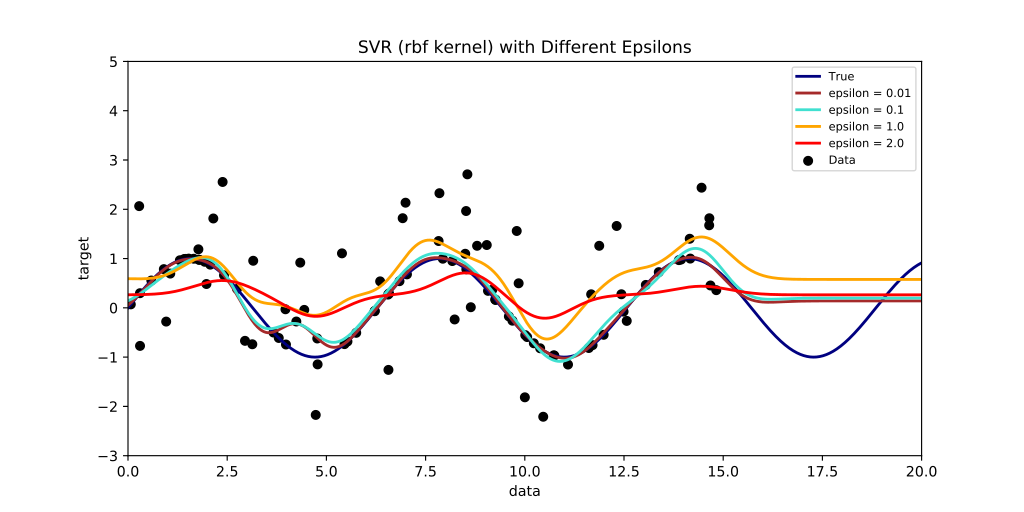

similar to gaussian processes, but introduces sparsity (similar to SVM)

## neural networks

kernel methods require you to choose a particular kernel function  
can be infinitely many kernels for one particular type of kernel if there are tunable hyperparameters  

idea: learn the kernel representation from the data instead of choosing one that might work

### optimization

gradient descent: $w \leftarrow w - \eta \nabla_w L(w)$

consider a node $j$ that takes input from note $l$ and feeds into node $k$

$\partial_{w_{lj}} L_i = \partial_{a_{ij}} L_i \times \partial_{w_{lj}} a_{ij}$  
$= \partial_{a_{ij}} L_i \times x_{il}$

$\partial_{a_{ij}} L_i = \partial_{x_{ij}} L_i \times \partial_{a_{ij}} x_{ij} = \partial_{x_{ij}} L_i \times g'(a_{ij})$  
where $g$ is the activation function

$\partial_{x_{ij}} L_i = \sum_k \partial_{a_{ik}} L_i \times \partial_{x_{ij}} a_{ik}$
$= \sum_k \partial_{a_{ik}} L_i \times w_{jk}$

etc.

when $j \neq s$  
let $\partial_{a_{in}} L_i = \Delta_{in}$ be the derivative of $L_i$ w.r.t. sum at node $n$

when $j = s$  
$\partial_{a_{is}} L = \partial_{ij} \times$ loss at $a_{is}, t_i$

**backpropagation**

1. initialize weights $w$
2. for $i = 1..N$
    1. forward: calculate $a_{ij} x_{ij}$ for all $j$
    2. backwards: calculate $\Delta_{ij}$ for all $j$
    3. for all $j$, calculate the gradient $\gamma_{lj} = \Delta_{ij} x_{il}$
    4. for all $l, j$, update $w_{lj} \leftarrow w_{lj} - \eta \times \gamma_{lj}$

**step size for gradient descent**

for a loss function $L(w)$ and step size $\eta$, the gradient descent step is $w \leftarrow w - \eta \nabla_w L(w)$

how to choose $\eta$?

**line search**

at each iteration, try many step sizes and pick the best one  
expect to get $|f(x) - f(x - \eta f'(x))| \geq \frac{\eta}{2} |f'(x)|^2$  
so a plausible algorithm might be

* set $\eta = 1$
* while $f(x - \eta f'(x)) > f(x) - \frac{\eta}{2} |f'(x)|^2$, 
set $\eta \leftarrow \eta / 2$

line search is expensive if computing $f$ and $f'$ is expensive

**online backpropagation**

for each observation $(x, t)$

1. for each $j$, compute $s_j$ and $x_j$ by going forward
    1. $s_j = \sum_l w_{lj} x_l$
    2. $x_j = \sigma(s_j) = \sigma(\sum_l w_{lj} x_l)$
2. for each $j$, compute $\Delta_j$ by going backward
    1. $\Delta_s = -(t - x_s) \sigma'(x_s)$
3. ...

**stochastic gradient descent**

let $\nabla = \partial_x f$  
set $\hat{\nabla}$ as a randomized estimate of $\nabla$ such that $E[\hat{\nabla}] = \nabla$ and $Var(\hat{\nabla}) < M < \infty$  
update step: $x_t = x_{t-1} \rho_t \hat{\nabla}$  
$\rho_t$ is a positive decreasing sequence (typically $\rho_t \propto t^{-k}$ for $k > 0$, e.g., $k=1 \implies \rho_i \propto t^{-1}$)

**online SGD**

let $f(w) = \sum_i^n f_i(w)$  
let $\hat{\nabla} = n \times \partial_w f_i(w)$  
then $E[\hat{\nabla}] = \nabla$

**minibatch SGD**

choose $I \subset \{1, ..., n\}$  
set $\hat{\nabla} = \frac{N}{|I|} \sum_{i \in I} \partial_w f_i (w)$  
then $E[\hat{\nabla}] = \nabla$

### numerical differentiation

$f'(x) = \lim\limits_{\epsilon \to 0} \frac{f(x + \epsilon) - f(x - \epsilon)}{2 \epsilon}$

then for some small $\epsilon$, $f'(x) \approx \frac{f(x + \epsilon) - f(x - \epsilon)}{2 \epsilon}$

in higher dimensions, $\partial_{x_i} f \approx \frac{f(x + \epsilon e_i) - f(x - \epsilon e_i)}{2 \epsilon}$  
$O(n^2)$

**weight decay**

recall regularized loss:  
$L(w) = \sum f_i(w) + \lambda |w|^2$  

then the gradient is  
$\nabla_w L(w) = \sum_i \nabla_w f_i(w) + \lambda w$  

then the gradient descent step simplifies to  
$w \leftarrow w (1 - \lambda \eta) - \eta \sum_i \nabla_w f_i(w)$

**momentum**

$w^{(k+1)} = w^{(k)} - \eta \big(\nabla_w f(w^{(k)}) + \alpha \nabla_w f(w^{(k-1)}) \big)$

**adaptive gradient descent**

AdaGrad / RMSProp / Adam

separate learning rate for each parameter

if gradient was large in previous steps, choose small $\eta$  
if gradient was small in previous steps, choose large $\eta$

AdaGrad

* let $g = \nabla_w f(w)$
* let $r = r + g * g$ where $*$ is element-wise product
* update step: $w \leftarrow w - \eta r^{-1/2} * g$ (element-wise operations on $r$)

RMSProp: similar to AdaGrad but weigh more recent gradients more  
$r \leftarrow (1 - \alpha) r + \alpha g * g$

**dropout**

calculate forward: for each $j$, set $x_j = 0$ with probability $p$  
calculate backward: $w_{lj} \leftarrow w_{lj} - \eta \Delta_i x_l$

**stacking unsupervised layers**

use autoencoders to compress inputs

e.g., given 4 features, we may set the first layer to 2 or 3 nodes, then the output is the original feature vector, with the loss being how different the input feature vector is from the output vector, then repeat this with each layer to get pre-trained weights for a network before training the entire network

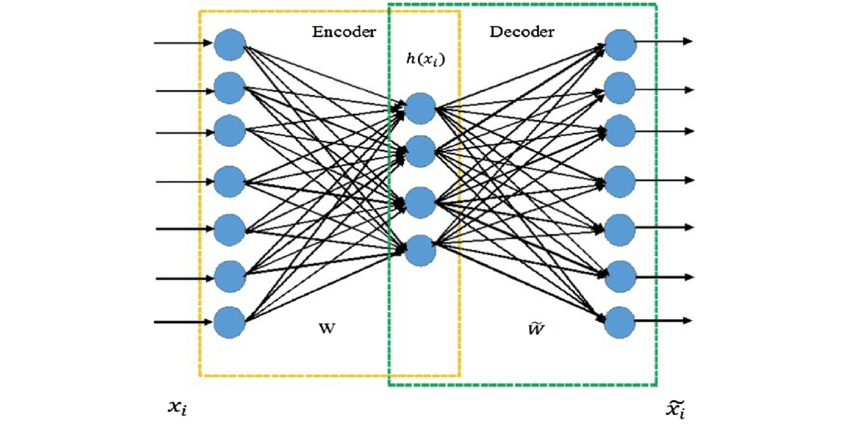

denoising autoencoders train with noisy/corrupted inputs to learn the denoised/uncorrupted outputs

variational/bayesian autoencoders

**convolutional neural networks**

convolutional filter: $x_i = \sigma(\sum_j w_{ji} x_j + b_i)$ where $j$ is restricted to a small patch of the image or previous layer

max pooling: $x_i = \max\limits_{j \in parents(i)} x_j$, again over a small patch  
average pooling: $x_i = \sum\limits_{j \in parents(i)} x_j$ over a small patch

residual networks  
skip connections

**recursive neural networks**

general idea: output of a node can be fed into itself over a sequence of inputs and outputs  
the hidden layers connect to an output node and also to the hidden layers of the next step of the sequence  
one case of this may be to predict the next term of the sequence given the previous terms

applications in machine translation

long short term memory (LSTM)

**learning representations and pre-training**

**bayesian neural networks**